# Tarea Semanal 1, Facundo Ivan Carranza

Este notebook tiene como objetivo analizar señales senoidales con diferentes frecuencias y visualizar su comportamiento en el dominio del tiempo.

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 14 09:33:20 2025

@author: Facundo Carranza

Descripción:
------------
Este es el testbench de la TS1, lo realice con los dos bonus cree dos 
funciones una como generadora de señales senoidales a la cual la grafico
con 4 frecuencias diferentes y otra como señales cuadradas

"""

##Importo Librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Defino mis funciones generadoras de señales

In [4]:
def funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    """
    Genero una señal senoidal con los siguientes parámetros:
        vmax: Amplitud máxima (volts)
        dc: Valor medio (volts)
        ff: Frecuencia de la señal (Hz)
        ph: Fase (radianes)
        nn: Número de muestras
        fs: Frecuencia de muestreo (Hz)
    
    Retorno:
        tt: Vector de tiempo (nn x 1)
        xx: Señal senoidal (nn x 1)
    """
    tt = np.arange(0, nn/fs, 1/fs).reshape(-1, 1)
    "Utilice el reshape para asegurar la forma de columna"
    xx = (dc + vmax * np.sin(2 * np.pi * ff * tt + ph)).reshape(-1, 1)
    return tt, xx

# Función para generar señal cuadrada (square wave)
def funcion_cuadrada(vmax=1, dc=0, ff=1, ph=0, nn=1000, fs=1000):
    """
    Genero una señal cuadrada con los siguientes parámetros:
        vmax: Amplitud máxima (volts)
        dc: Valor medio (volts)
        ff: Frecuencia de la señal (Hz)
        ph: Fase (radianes)
        nn: Número de muestras
        fs: Frecuencia de muestreo (Hz)
    
    Retorna:
        tt: Vector de tiempo (nn x 1)
        xx: Señal cuadrada (nn x 1)
    """
    tt = np.arange(0, nn/fs, 1/fs).reshape(-1, 1)
    # Generamos la senoidal base
    seno = np.sin(2 * np.pi * ff * tt + ph)
    # La señal cuadrada se obtiene al umbralizar la senoidal
    xx = dc + vmax * np.where(seno >= 0, 1, -1) 
    
    """
    Utilice la funcion np.where para tomar la senoidal creada arriba
    para transformarla en una señal cuadrada
    """
    
    return tt, xx.reshape(-1, 1)

## Establezco los parametros de las señales senoidales

In [5]:
N = 1000    # Número de muestras
fs = 5000   # Frecuencia de muestreo alta para observar bien la señal en altas frecuencias

# Lista de frecuencias para experimentar
frecuencias = [500, 999, 1001, 2001]  # en Hz

## Grafico las señales senoidales

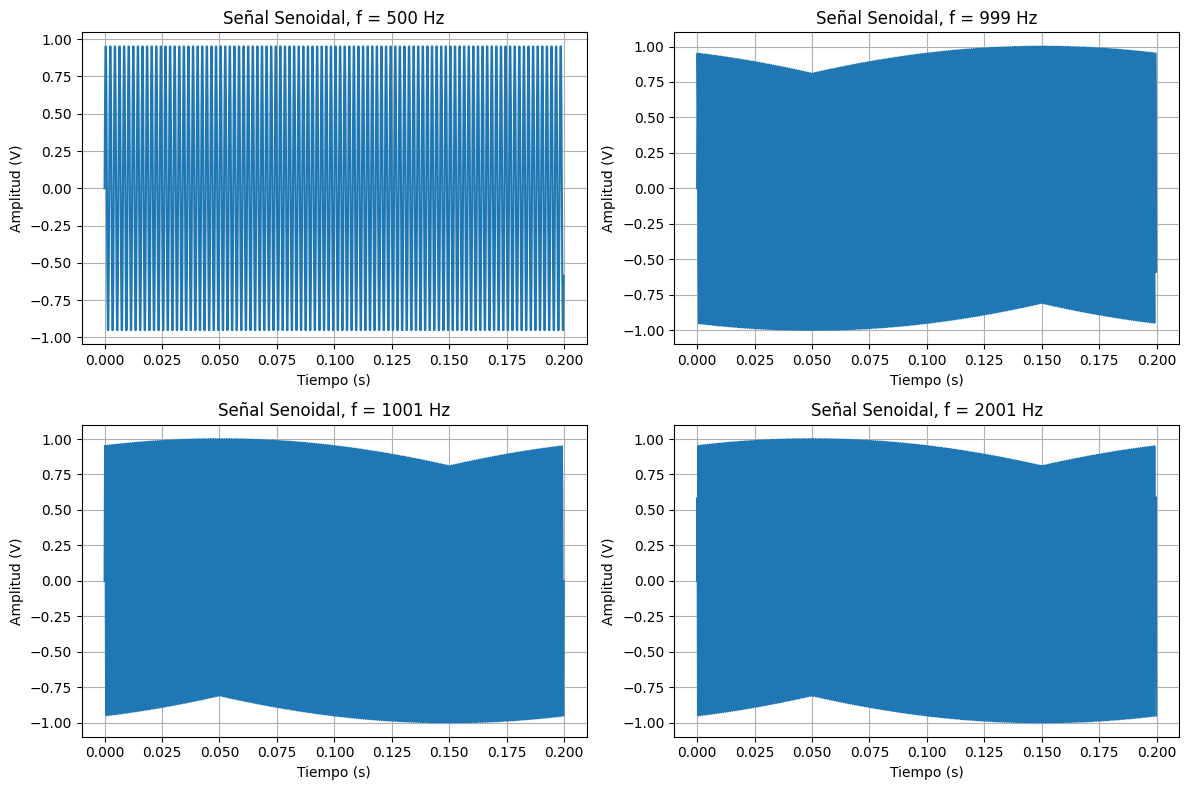

In [6]:
plt.figure(figsize=(12, 8))
for i, f in enumerate(frecuencias):
    tt, xx = funcion_sen(vmax=1, dc=0, ff=f, ph=0, nn=N, fs=fs)
    plt.subplot(2, 2, i+1)
    plt.plot(tt, xx)
    plt.title(f'Señal Senoidal, f = {f} Hz')
    plt.xlabel("Tiempo (s)")
    plt.ylabel("Amplitud (V)")
    plt.grid(True)
plt.tight_layout()
plt.show()

## Establezco parametros de la señal cuadrada

In [7]:
f_square = 50  # Frecuencia de la señal cuadrada
tt_sq, xx_sq = funcion_cuadrada(vmax=1, dc=0, ff=f_square, ph=0, nn=N, fs=fs)

## Grafico la señal cuadrada

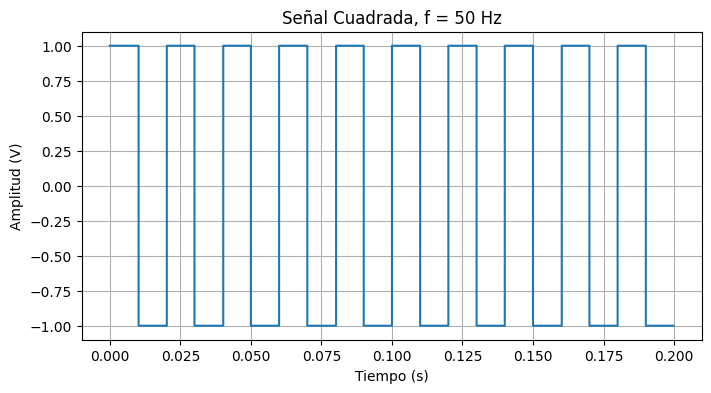

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(tt_sq, xx_sq, drawstyle='steps-post')
plt.title(f'Señal Cuadrada, f = {f_square} Hz')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (V)")
plt.grid(True)
plt.show()